<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">

<h1 align=center><font size = 5>Linear Regression 1-D: Training Two Parameter Mini-Batch Gradient Decent Pytorch way </font></h1> 

# Table of Contents
In this lab, you will create a model the Pytroch way, this will help you as models get more complicated 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data </a></li>
<li><a href="#ref1">Create the Model and Cost Function Pytorch way </a></li>
<li><a href="#ref2">Train the Model:Batch Gradient Descent</a></li>

<br>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>

<hr>

You'll need the following libraries:  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with Pytorch. 

In [2]:
class plot_error_surfaces(object):
    def __init__(self,w_range, b_range,X,Y,n_samples=30,go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z=np.zeros((30,30))
        count1=0
        self.y=Y.numpy()
        self.x=X.numpy()
        for w1,b1 in zip(w,b):
            count2=0
            for w2,b2 in zip(w1,b1):
                Z[count1,count2]=np.mean((self.y-w2*self.x+b2)**2)
                count2 +=1
    
            count1 +=1
        self.Z=Z
        self.w=w
        self.b=b
        self.W=[]
        self.B=[]
        self.LOSS=[]
        self.n=0
        if go==True:
            plt.figure()
            plt.figure(figsize=(7.5,5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    def get_stuff(self,model,loss):
        self.n=self.n+1
        
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())

    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c='r', marker='x',s=200,alpha=1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x,self.y,'ro',label="training points")
        plt.plot(self.x,self.W[-1]*self.x+self.B[-1],label="estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: '+str(self.n))
        plt.legend()
        plt.show()
        plt.subplot(122)
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.title('Loss Surface Contour Iteration'+str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.legend()

<a id="ref0"></a>
<h2 align=center>Make Some Data </h2>

Import Pytorch: 

In [3]:
import torch

Set random seed: 

In [4]:
torch.manual_seed(1)

Generate values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate. Add some noise to the data:

In [5]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-3,3,0.1).view(-1, 1)
        self.f=1*self.x-1
        self.y=self.f+0.1*torch.randn(self.x.size())
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

Create a dataset object: 

In [6]:
dataset=Data()

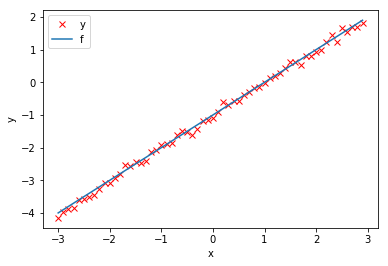

In [7]:
plt.plot(dataset.x.numpy(),dataset.y.numpy(),'rx',label='y')
plt.plot(dataset.x.numpy(),dataset.f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<a id="ref1"></a>
<h2 align=center>Create the Model and Total Loss Function (cost) </h2>

Create a linear regression class 

In [8]:
from torch import nn,optim

class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

We will use Pytorch's  Build in functions   to create a criterion function; this calculates the total loss or cost 

In [9]:
criterion = nn.MSELoss()

Create a linear regression object , the optimiser object creates a linear regression object , the optimiser object.

In [10]:
model=linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

remember to construct an Optimizer you have to give it an iterable containing the parameters i.e. provide <code> model.parameters()</code> as an input ot the object constructor 

<img src = "https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width = 100, align = "center">


Create a dataloader object: 

In [11]:
trainloader=DataLoader(dataset=dataset,batch_size=1)

Pytorch randomly initialises your model parameters. If we use those parameters, the result will not be very insightful as convergence will be extremely fast. So we will initialise the parameters such that it will take longer to converge, i.e. look cool  

In [12]:
model.state_dict()['linear.weight'][0]=-15
model.state_dict()['linear.bias'][0]=-10

create a plotting object, not part of Pytroch,  just used to help visualise 

In [13]:
get_surface=plot_error_surfaces(15,13,dataset.x,dataset.y,30,go=False)

<a id="ref2"></a>
<h2 align=center>Train the Model via Batch Gradient Descent </h2>

Run 10 epochs of stochastic gradient descent: **bug** data space is 1 iteration ahead of parameter space. 

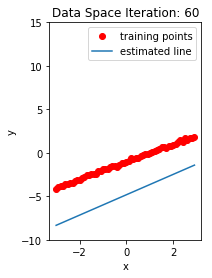

No handles with labels found to put in legend.


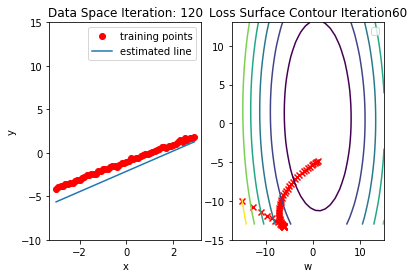

No handles with labels found to put in legend.


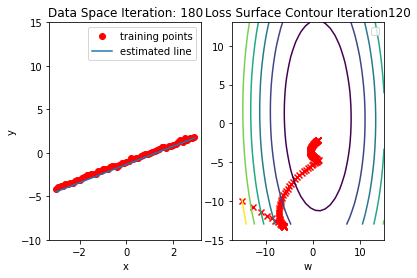

No handles with labels found to put in legend.


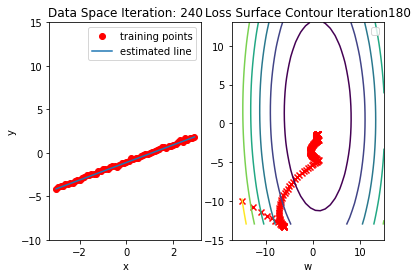

No handles with labels found to put in legend.


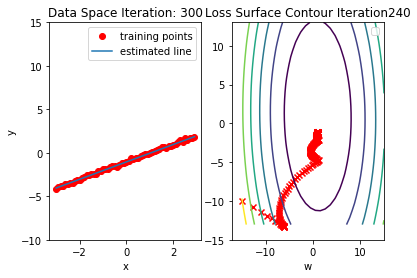

No handles with labels found to put in legend.


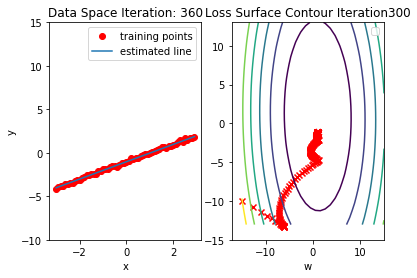

No handles with labels found to put in legend.


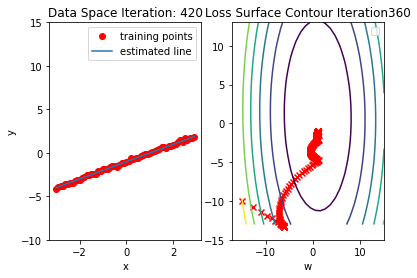

No handles with labels found to put in legend.


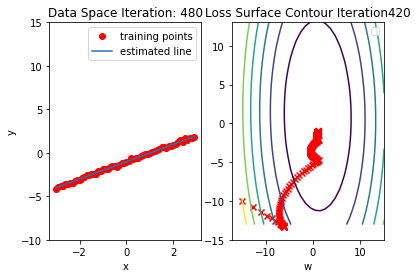

No handles with labels found to put in legend.


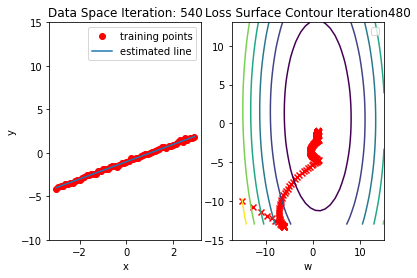

No handles with labels found to put in legend.


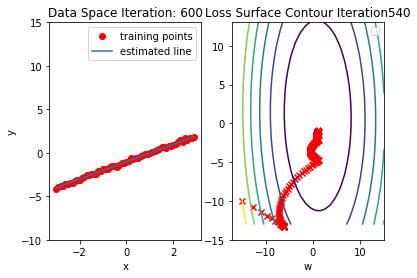

No handles with labels found to put in legend.


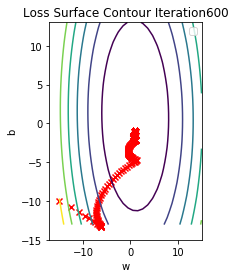

In [14]:
epochs=10

for epoch in range(epochs):
    for x,y in trainloader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #for plotting 
        get_surface.get_stuff(model,loss.tolist())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()

    get_surface.plot_ps()

Let's use the following diagram to help clarify the process. The model takes x to produce an estimate yhat , it will then be compared to the actual y  with the loss function

<img src = "https://ibm.box.com/shared/static/jo95jdvdfghxtbzwcnh0yig7choxqqxc.png" width = 500, align = "center">

When we call <code>backward()</code> on the loss function, it will handle the differentiation. Calling the method step on the optimiser object it will update the parameters as they were inputs when we constructed the optimiser object. The connection is shown in the following figure :


<img src = "https://ibm.box.com/shared/static/oorp4w5ucfahk3vuf333nt9zrw9hefek.png" width = 500, align = "center">

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/) 

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).